# Water potability prediction project based on Kaggle dataset

### The potability classes 0 & 1 depicts non-potable and potable respectively.

In [1]:
# import dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline


In [2]:
# load  data into dataframe

water = pd.read_csv("C:\\Users\\USER\\Desktop\\python videos\\water_potability.csv")

water.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [3]:
#to determine the row and column distribution

water.shape

(3276, 10)

In [4]:
# to check for datatypes involved

water.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

#### the columns are all numerical

In [5]:
# to check for missing values

water.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### Exploratory data analysis

Text(0.5, 1.0, 'Potability distribution')

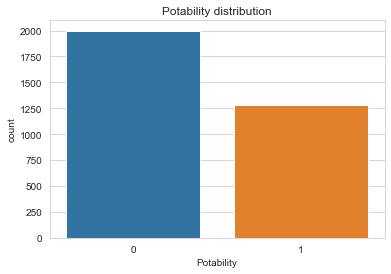

In [6]:
# to visualize the potability distribution

sns.set_style("whitegrid")
sns.countplot(x="Potability", data = water)
plt.title("Potability distribution")

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph'>

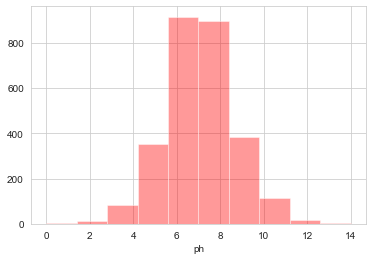

In [7]:
# ph distribution

sns.distplot(water["ph"].dropna(), kde=False, color = "r", bins = 10)

<AxesSubplot:xlabel='Turbidity'>

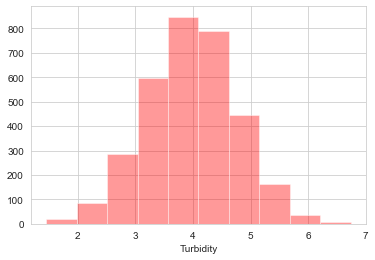

In [8]:
# Turbidity distribution

sns.distplot(water["Turbidity"], kde=False, color = "r", bins = 10)

<AxesSubplot:xlabel='Turbidity', ylabel='Solids'>

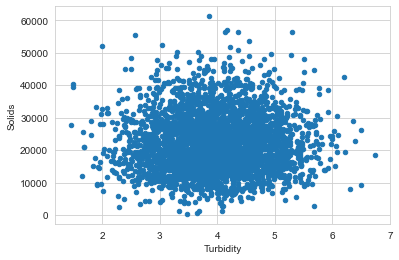

In [9]:
water.plot.scatter("Turbidity", "Solids")

<AxesSubplot:ylabel='Frequency'>

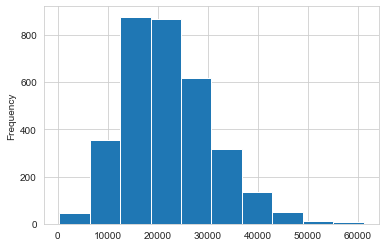

In [10]:
water["Solids"].plot.hist()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


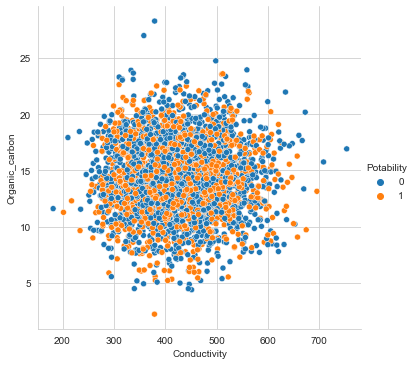

In [11]:
sns.relplot("Conductivity", "Organic_carbon", hue = "Potability", data = water)

Text(0.5, 1.0, 'null values plot')

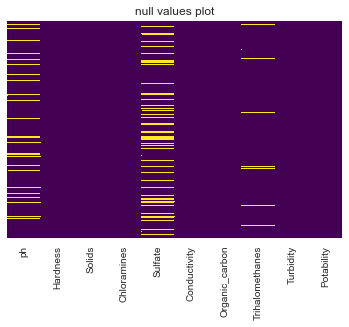

In [12]:
# visualisation of missing values distribution 

sns.heatmap(water.isna(), yticklabels = False, cbar = False, cmap =  "viridis")
plt.title("null values plot")

<AxesSubplot:xlabel='Potability', ylabel='Trihalomethanes'>

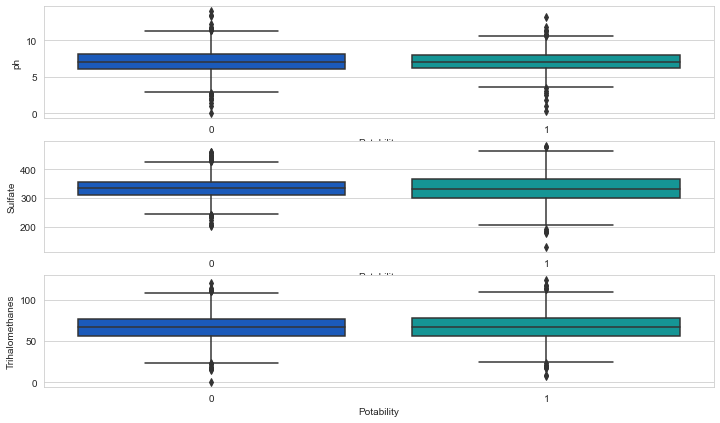

In [13]:
# to determine the average Hardness by potability

plt.figure(figsize=(12,7))
plt.subplot(311)
sns.boxplot(x = "Potability", y = "ph", data = water, palette = "winter")

plt.subplot(312)
sns.boxplot(x = "Potability", y = "Sulfate", data = water, palette = "winter")

plt.subplot(313)
sns.boxplot(x = "Potability", y = "Trihalomethanes", data = water, palette = "winter")




In [14]:
# filling up NaN values
water = water.fillna(water.mean())
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


Text(0.5, 1.0, 'Correlation heatpmap')

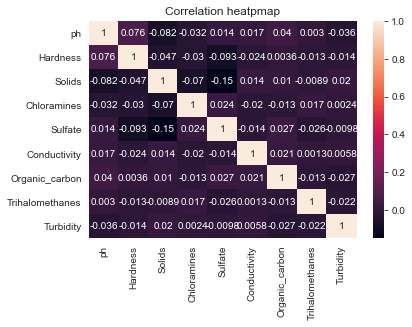

In [15]:
#correlation heatmap

corr = water.drop("Potability", axis=1).corr()
sns.heatmap(corr, annot = True)
plt.title("Correlation heatpmap")

##### it's a low correlation dataset

In [16]:
# assigning faetures to variables

x = water.drop("Potability",  axis = 1)
y = water["Potability"]

#### Feature Selection

[0.12553637 0.11811388 0.11217652 0.11328598 0.1267267  0.10254163
 0.1004423  0.1017734  0.09940323]


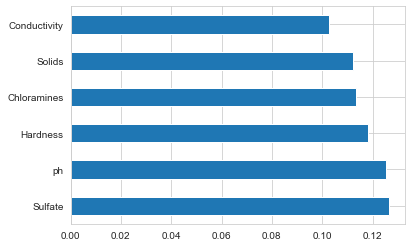

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
feature_model = ExtraTreesClassifier()
feature_model.fit(x, y)
print(feature_model.feature_importances_)
feature_importances = pd.Series(feature_model.feature_importances_, index = x.columns)
feature_importances.nlargest(6).plot(kind="barh")
plt.show()

In [41]:
# train-test-split

x_train, x_test, y_train, y_test = train_test_split(x.drop(["Trihalomethanes", "Turbidity", "Organic_carbon"], axis=1), y, test_size=0.3, random_state=1)

### Defining Random Forest Model

In [42]:
model = RandomForestClassifier(n_estimators=100, random_state= 0)

In [43]:
model.fit(x_train,y_train)
prediction = model.predict(x_test)

In [44]:
confusion_mat = confusion_matrix(y_test, prediction)
confusion_mat

array([[521,  64],
       [248, 150]], dtype=int64)

In [45]:
class_report = classification_report(y_test, prediction)
print(class_report)

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       585
           1       0.70      0.38      0.49       398

    accuracy                           0.68       983
   macro avg       0.69      0.63      0.63       983
weighted avg       0.69      0.68      0.66       983



In [67]:
accuracy_scr = accuracy_score(y_test, prediction)
print("accuracy = {}{}".format(accuracy_scr*100,"%"))

accuracy = 68.26042726347914%


In [70]:
from sklearn.metrics import recall_score, precision_score

recall_scr = recall_score(y_test, prediction)
print("recall = {}{}".format(recall_scr*100,"%"))

recall = 37.68844221105528%


In [72]:
precision_scr = precision_score(y_test, prediction)
print("precision {}{}".format(precision_scr*100, "%"))

precision 70.09345794392523%


### Random forest model yielded an accuracy of 68%

### Using Hyper parameter tuning to improve model performance

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
# creating parameter values

estimators = range(100,1001)

In [49]:
# specifying parameter distribution

param_dist = dict(n_estimators = estimators)

In [50]:
rand = RandomizedSearchCV(model, param_dist, cv = 10, scoring = "accuracy", n_iter = 10, random_state= 5)
rand.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'n_estimators': range(100, 1001)},
                   random_state=5, scoring='accuracy')

In [51]:
print(rand.best_estimator_)

RandomForestClassifier(n_estimators=448, random_state=0)


In [52]:
print(rand.best_params_)

{'n_estimators': 448}


In [53]:
print(rand.best_score_)

0.6755363584583255


 ### Applying new parameters to Random forest model

In [54]:
rf_model_hyper = RandomForestClassifier(n_estimators=313, random_state= 0)

In [55]:
rf_model_hyper.fit(x_train,y_train)
prediction_hyper = rf_model_hyper.predict(x_test)

In [56]:
confusion_mat_hyper = confusion_matrix(y_test, prediction_hyper)
print(confusion_mat_hyper)

[[518  67]
 [254 144]]


In [57]:
accuracy_scr_hyper = accuracy_score(y_test, prediction_hyper)
print(accuracy_scr_hyper)

0.6734486266531028


### Accuracy score of random forest model yielded 67% score, thus a 1% decrease from the untuned model, this means that the untuned model gave a better performance to the project

In [38]:
class_report_hyper = classification_report(y_test, prediction_hyper)
print(class_report_hyper)

              precision    recall  f1-score   support

           0       0.67      0.86      0.75       585
           1       0.65      0.39      0.49       398

    accuracy                           0.67       983
   macro avg       0.66      0.62      0.62       983
weighted avg       0.66      0.67      0.65       983

